In [1]:
import sys
print(sys.version)

3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]


In [ ]:
import mysql.connector
import pandas as pd
import matplotlib.pyplot as plt

# 1) connect
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="ABCD",   # <- change this
    database="sales_db"         # <- ensure this DB exists
)
print("Connected!")

# 2) query
query = """
SELECT product,
       SUM(quantity) AS total_qty,
       SUM(quantity * price) AS revenue
FROM sales
GROUP BY product;
"""
df = pd.read_sql(query, conn)
print(df)

# 3) plot
df.plot(kind='bar', x='product', y='revenue', legend=False)
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.show()

# 4) close
conn.close()


In [2]:
!pip uninstall mysql-connector-python -y
!pip install pymysql pandas matplotlib

Found existing installation: mysql-connector-python 9.4.0
Uninstalling mysql-connector-python-9.4.0:
  Successfully uninstalled mysql-connector-python-9.4.0


In [3]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt

conn = pymysql.connect(
    host="localhost",
    user="root",
    password="ABCD",   # your password
    database="sales_db"
)

print("Connection successful!")

Connection successful!


In [4]:
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue
FROM orders
GROUP BY product;
"""

df = pd.read_sql(query, conn)
print("Sales Summary:\n", df)

Sales Summary:
   product  total_qty   revenue
0  Laptop       16.0  812000.0
1  Mobile       32.0  652000.0
2  Tablet       16.0  240000.0


C:\Users\NAVEEN\AppData\Local\Temp\ipykernel_21172\1797483040.py:9: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


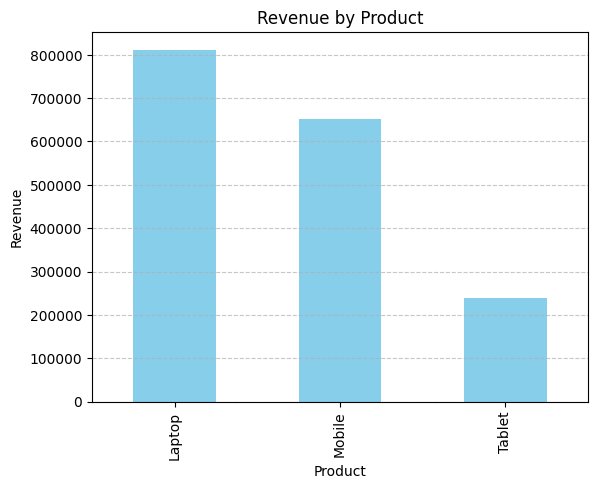

In [5]:
df.plot(kind='bar', x='product', y='revenue', legend=False, color='skyblue')
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [6]:
conn.close()
print("MySQL connection closed.")

MySQL connection closed.
